# Part II - Fashion Mnist
#####  @ Haim Goldfisher

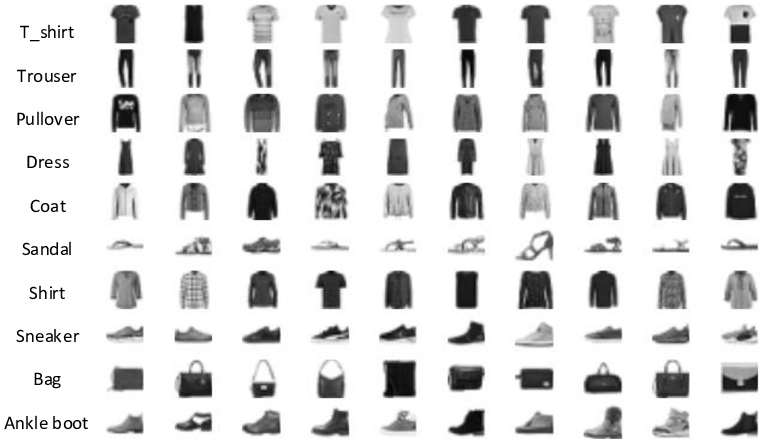

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import make_pipeline

In [55]:
df_train = pd.read_csv("C:\\Haim\\Anaconda\\fashion_mnist_train.csv")

df_train.sample(n = 4, random_state = 8).sort_values(by = 'label')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
56059,2,0,0,0,0,0,2,0,0,0,...,5,4,0,45,147,144,4,0,0,0
32997,4,0,0,0,0,0,0,1,2,0,...,3,0,0,191,198,0,0,0,0,0
50681,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13395,8,0,0,0,0,0,0,0,0,0,...,211,214,208,199,197,208,212,193,42,0


As we can see, we have the label - the type of cloth, and 0-255 value for each pixel in the frame.

In [56]:
df_train.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [57]:
df_train.shape # 60000 rows and 785 columns (784 pixels + label column)

(60000, 785)

In [58]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [59]:
df_train.isnull().sum().sum() # the dataset has no NaN values

0

As we can see, the biggest number inside the dataset is 255. Using int64 is unnecessary in such low values.
We would like to change the data type from int64 to int8 and int16 for lower memory usage.

In [60]:
## downcasting loop
for column in df_train:
    if df_train[column].dtype == 'int64':
        df_train[column]=pd.to_numeric(df_train[column], downcast='integer')

In [61]:
df_train.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int16(780), int8(5)
memory usage: 89.6 MB


You can see that we saved 270 MB right now.

In [62]:
df_train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int8)

There are 10 labels, it means that there are 10 different types of clothing to be classified:

* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot

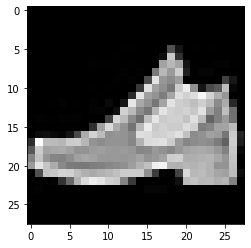

In [68]:
X_train = df_train.drop(['label'], axis=1).to_numpy()

img = X_train[1].reshape(28,28)
plt.imshow(img, plt.cm.gray)
plt.show()

## Data Processing

The things that are important to consider before start to work with the data:
- As we can see, when pixels value is 0 (black pixel), it means that its an empty pixel. We would like to drop pixels which are empty in each frame.
- We would like to understand which cloths are difficult to classify, and which are easier.

0        6002
1        6009
2        6006
3        6000
4        6003
         ... 
59995    6009
59996    6001
59997    6008
59998    6008
59999    6007
Name: label, Length: 60000, dtype: int16
0        59986
1        59986
2        59986
3        59986
4        59986
         ...  
59995    59986
59996    59986
59997    59986
59998    59986
59999    59986
Name: pixel1, Length: 60000, dtype: int32
0        59872
1        59872
2        59872
3        59872
4        59872
         ...  
59995    59872
59996    59872
59997    59872
59998    59872
59999    59872
Name: pixel2, Length: 60000, dtype: int32
0        59253
1        59253
2        59253
3        59253
4        59253
         ...  
59995    59253
59996    59253
59997    59253
59998    59253
59999    59253
Name: pixel3, Length: 60000, dtype: int32
0        58586
1        58586
2        58586
3        58587
4        58586
         ...  
59995    58586
59996    58586
59997    58586
59998    58586
59999    58586
Name: pixel4, Lengt

0        15658
1        15434
2        15619
3        15669
4        15657
         ...  
59995    15655
59996    15505
59997    15434
59998    15446
59999    15434
Name: pixel158, Length: 60000, dtype: int16
0        16290
1        16140
2        16251
3        16276
4        16283
         ...  
59995    16271
59996    16116
59997    16059
59998    16060
59999    16059
Name: pixel159, Length: 60000, dtype: int16
0        18848
1        18620
2        18797
3        18816
4        18831
         ...  
59995    18853
59996    18607
59997    18600
59998    18599
59999    18599
Name: pixel160, Length: 60000, dtype: int16
0        24743
1        24489
2        24673
3        24618
4        24590
         ...  
59995    24640
59996    24489
59997    24489
59998    24652
59999    24489
Name: pixel161, Length: 60000, dtype: int16
0        28653
1        28609
2        28806
3        28788
4        28608
         ...  
59995    28837
59996    28608
59997    28608
59998    28706
59999    28608

0        21554
1        21362
2        21551
3        21494
4        21341
         ...  
59995    21560
59996    21341
59997    21341
59998    21441
59999    21411
Name: pixel303, Length: 60000, dtype: int16
0        26420
1        26265
2        26220
3        26321
4        26191
         ...  
59995    26417
59996    26191
59997    26192
59998    26308
59999    26219
Name: pixel304, Length: 60000, dtype: int16
0        33752
1        33811
2        33721
3        33846
4        33721
         ...  
59995    33960
59996    33721
59997    33722
59998    33870
59999    33721
Name: pixel305, Length: 60000, dtype: int32
0        38639
1        38829
2        38639
3        38678
4        38639
         ...  
59995    38725
59996    38639
59997    38639
59998    38792
59999    38645
Name: pixel306, Length: 60000, dtype: int32
0        44490
1        44494
2        44486
3        44486
4        44486
         ...  
59995    44486
59996    44486
59997    44486
59998    44627
59999    44538

0        6868
1        6832
2        6864
3        6879
4        6871
         ... 
59995    6832
59996    6652
59997    6856
59998    6904
59999    6873
Name: pixel491, Length: 60000, dtype: int16
0        3181
1        3183
2        3155
3        3138
4        3185
         ... 
59995    3162
59996    2999
59997    3164
59998    3214
59999    3183
Name: pixel492, Length: 60000, dtype: int16
0        1945
1        1950
2        1918
3        1872
4        1948
         ... 
59995    1946
59996    1896
59997    1928
59998    1983
59999    1949
Name: pixel493, Length: 60000, dtype: int16
0        1884
1        1895
2        1855
3        1850
4        1888
         ... 
59995    1887
59996    1794
59997    1862
59998    1901
59999    1893
Name: pixel494, Length: 60000, dtype: int16
0        3197
1        3189
2        3170
3        3168
4        3211
         ... 
59995    3199
59996    3054
59997    3184
59998    3184
59999    3207
Name: pixel495, Length: 60000, dtype: int16
0        7

Name: pixel669, Length: 60000, dtype: int32
0        48689
1        48689
2        48689
3        48689
4        48689
         ...  
59995    48795
59996    48689
59997    48689
59998    48885
59999    48689
Name: pixel670, Length: 60000, dtype: int32
0        52153
1        52153
2        52153
3        52153
4        52153
         ...  
59995    52252
59996    52153
59997    52153
59998    52363
59999    52153
Name: pixel671, Length: 60000, dtype: int32
0        56271
1        56271
2        56271
3        56271
4        56271
         ...  
59995    56271
59996    56271
59997    56271
59998    56296
59999    56271
Name: pixel672, Length: 60000, dtype: int32
0        57621
1        57621
2        57621
3        57621
4        57621
         ...  
59995    57621
59996    57621
59997    57621
59998    57621
59999    57621
Name: pixel673, Length: 60000, dtype: int32
0        55779
1        55779
2        55779
3        55779
4        55779
         ...  
59995    55786
59996    55779


In [33]:
target = df_train['label'] # the feature we would like to predict
data = df_train.drop(['label'], axis = 1) # we will drop target from data, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data, target, random_state=0) #train\test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

C:\Haim\Anaconda\Python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.85